<a href="https://colab.research.google.com/github/fazmila/Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
#Reading the dataset1
app_record= pd.read_csv('/content/drive/MyDrive/application_record.csv')
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [117]:
cred_record  = pd.read_csv('/content/drive/MyDrive/credit_record.csv')
cred_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [118]:
#To display the first five rows of the Application Data.
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [119]:
#To display the first five rows of the Credit Data.
cred_record .head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [120]:
#To show the number of rows and columns in dataset
app_record.shape

(438557, 18)

In [121]:
cred_record .shape

(1048575, 3)

In [122]:
# Find and display the unique values in the 'STATUS' column
unique_status_values = cred_record ['STATUS'].unique()
print("Unique values in the 'STATUS' column:", unique_status_values)

Unique values in the 'STATUS' column: ['X' '0' 'C' '1' '2' '3' '4' '5']


In [123]:
# Group data by ID and calculate the account age
account_age = cred_record .groupby('ID')['MONTHS_BALANCE'].agg(['min', 'max'])
# Calculate the age in months for each ID
account_age['ACCOUNT_AGE_MONTHS'] = account_age['max'] - account_age['min']
# Reset the index for better readability
account_age = account_age.reset_index()
account_age.head()

,ID,min,max,ACCOUNT_AGE_MONTHS
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


In [124]:
# Drop the 'min' and 'max' columns, keeping only 'ACCOUNT_AGE_MONTHS'
account_age = account_age[['ID', 'ACCOUNT_AGE_MONTHS']]

# Display the updated DataFrame
account_age.head()


,ID,ACCOUNT_AGE_MONTHS
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [125]:
# Join account_age with app_record on 'ID'
app_record = app_record.merge(account_age, on='ID', how='left')
# Display the first few rows of the merged dataset
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0


In [126]:
# Initialize 'Applicant_Category' column to None
cred_record ['Applicant_Category'] = None

# Define a function to classify applicants based on the 'STATUS' value
def classify_applicant(status):
    if status in ['2', '3', '4', '5']:
        return 'bad'
    else:
        return 'good'

# Apply the function to the 'STATUS' column to classify applicants
cred_record ['Applicant_Category'] = cred_record ['STATUS'].apply(classify_applicant)

In [127]:
# Display the unique values in the 'Applicant_Category' column
cred_record ['Applicant_Category'].unique()

array(['good', 'bad'], dtype=object)

In [128]:
# Create a new DataFrame to summarize applicant status
# Count occurrences of 'bad' and 'good' for each 'ID'
applicant_status = cred_record.groupby('ID')['Applicant_Category'].apply(
    lambda x: 'bad' if (x == 'bad').sum() > 0 else 'good'
).reset_index()

In [129]:
applicant_status

,ID,Applicant_Category
0,5001711,good
1,5001712,good
2,5001713,good
3,5001714,good
4,5001715,good
...,...,...
45980,5150482,good
45981,5150483,good
45982,5150484,good
45983,5150485,good


In [130]:
# Join the applicant_status DataFrame with the application_record DataFrame on the 'ID' column
app_record = pd.merge(app_record, applicant_status, how='inner', on='ID')

# Display the first few rows of the merged DataFrame
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32.0,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9.0,bad


In [131]:
app_record.shape

(36457, 20)

In [132]:
# Function to calculate the age of a customer in years
def calculate_age(days_birth):
    return abs(days_birth) // 365.25  # Convert days to years and take absolute value

In [133]:
def calculate_employment_length(days_employed):
    # Handle negative values by converting them to positive
    if days_employed < 0:
        days_employed = abs(days_employed)  # Convert negative to positive

    # Calculate the employment length in years (with decimal precision)
    employment_length_years = days_employed / 365.25  # Convert days to years considering leap years

    # Return the employment length rounded to 2 decimal places
    return round(employment_length_years, 2)

In [134]:
#Function to edit family status
def family_status(fam_status):
    if fam_status == 'Single / not married':
        return 'Single'
    elif fam_status == 'Civil marriage':
        return 'Married'
    return fam_status

In [135]:
def house_type(house_type):
    parts = house_type.split(' /')  # Split by ' /'
    if len(parts) > 1:
        return parts[1].strip()  # Return the part after '/'
    return house_type  # Return original if no split

In [136]:
# function to convert from float dtype to int dtype
def count_of_child(cnt_family):
    return int(cnt_family)

In [137]:
# Apply the calculate_age function on the 'DAYS_BIRTH' column to calculate the customer's age
app_record['DAYS_BIRTH'] = app_record['DAYS_BIRTH'].apply(calculate_age)

# Apply the calculate_employment_length function on the 'DAYS_EMPLOYED' column to calculate employment length
app_record['DAYS_EMPLOYED'] = app_record['DAYS_EMPLOYED'].apply(calculate_employment_length)

# Apply the family_status function on the 'NAME_FAMILY_STATUS' column to standardize family status
app_record['NAME_FAMILY_STATUS'] = app_record['NAME_FAMILY_STATUS'].apply(family_status)

# Apply the house_type function on the 'NAME_HOUSING_TYPE' column to process housing type information
app_record['NAME_HOUSING_TYPE'] = app_record['NAME_HOUSING_TYPE'].apply(house_type)

# Apply the function to convert 'CNT_FAM_MEMBERS' to integer
app_record['CNT_FAM_MEMBERS'] = app_record['CNT_FAM_MEMBERS'].apply(count_of_child)

In [138]:
# Rename columns for better readability and understanding
app_record = app_record.rename(columns={'DAYS_BIRTH': 'APPLICANT_AGE', 'DAYS_EMPLOYED': 'YEARS_EMPLOYED'})

In [139]:
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,APPLICANT_AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,1,1,0,0,NaN,2,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,1,1,0,0,NaN,2,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,apartment,58.0,3.10,1,0,0,0,Security staff,2,29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,1,0,1,1,Sales staff,1,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,1,0,1,1,Sales staff,1,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,apartment,47.0,6.63,1,0,0,0,Managers,2,11.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,apartment,33.0,3.63,1,0,1,1,Medicine staff,2,23.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,apartment,33.0,3.63,1,0,1,1,Medicine staff,2,32.0,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,apartment,49.0,1.79,1,0,0,0,Sales staff,2,9.0,bad


In [140]:
app_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  APPLICANT_AGE        36457 non-null  float64
 11  YEARS_EMPLOYED       36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [141]:
# Unique Value Count for Each Column
column_unique_count = app_record.nunique().sort_values().reset_index()
column_unique_count.columns = ['Column_Name', 'Number_unique']
print("\nUnique Value Count:")
column_unique_count


Unique Value Count:


,Column_Name,Number_unique
0,FLAG_MOBIL,1
1,Applicant_Category,2
2,CODE_GENDER,2
3,FLAG_OWN_CAR,2
4,FLAG_OWN_REALTY,2
5,FLAG_EMAIL,2
6,FLAG_PHONE,2
7,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,4
9,NAME_INCOME_TYPE,5


In [142]:
# Convert Numerical Binary Columns to Object (Categorical)
binary_columns = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
app_record[binary_columns] = app_record[binary_columns].astype('object')
# Replace 1 with 'Y' and 0 with 'N'
app_record[binary_columns] = app_record[binary_columns].replace({1: 'Y', 0: 'N'})

In [143]:
# Categorical Columns Overview
app_record.describe(include='O')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,Applicant_Category
count,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,25134,36457
unique,2,2,2,5,5,4,6,1,2,2,2,18,2
top,F,N,Y,Working,Secondary / secondary special,Married,apartment,Y,N,N,N,Laborers,good
freq,24430,22614,24506,18819,24777,27993,32548,36457,28235,25709,33186,6211,35841


In [144]:
# Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
for col in app_record.select_dtypes(include='object').columns:
    print(f"{col}: {app_record[col].unique()}")
    print(app_record[col].value_counts())
    print('-' * 90)


Unique Values in Categorical Columns:
CODE_GENDER: ['M' 'F']
CODE_GENDER
F    24430
M    12027
Name: count, dtype: int64
------------------------------------------------------------------------------------------
FLAG_OWN_CAR: ['Y' 'N']
FLAG_OWN_CAR
N    22614
Y    13843
Name: count, dtype: int64
------------------------------------------------------------------------------------------
FLAG_OWN_REALTY: ['Y' 'N']
FLAG_OWN_REALTY
Y    24506
N    11951
Name: count, dtype: int64
------------------------------------------------------------------------------------------
NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_INCOME_TYPE
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: count, dtype: int64
------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE: ['Higher education' 'Secondary / 

In [145]:
# Numerical Columns Overview
print("\nNumerical Columns Description:")
app_record.describe().T


Numerical Columns Description:


,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.00,5042028.0,5074614.00,5115396.00,5150487.00
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.00,0.0,0.00,1.00,19.00
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.00,121500.0,157500.00,225000.00,1575000.00
APPLICANT_AGE,36457.0,4.323203e+01,11.503981,20.00,34.0,42.00,53.00,68.00
YEARS_EMPLOYED,36457.0,1.743012e+02,371.449664,0.05,3.2,6.89,15.55,999.98
CNT_FAM_MEMBERS,36457.0,2.198453e+00,0.911686,1.00,2.0,2.00,3.00,20.00
ACCOUNT_AGE_MONTHS,36457.0,2.033239e+01,14.911849,0.00,8.0,17.00,30.00,60.00


In [146]:
# Unique Values in Numerical Columns
print("\nUnique Values in Numerical Columns:")
for col in app_record.select_dtypes(include=[np.int64, np.float64]).columns:
    print(f"{col}: {app_record[col].unique()}")
    print(app_record[col].value_counts())
    print('-' * 90)


Unique Values in Numerical Columns:
ID: [5008804 5008805 5008806 ... 5149838 5150049 5150337]
ID
5008804    1
5096993    1
5096983    1
5096987    1
5096988    1
          ..
5050819    1
5050815    1
5050813    1
5050812    1
5150337    1
Name: count, Length: 36457, dtype: int64
------------------------------------------------------------------------------------------
CNT_CHILDREN: [ 0  1  3  2  4  5 14 19  7]
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64
------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL: [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500

In [147]:
# Check Duplicate Rows
duplicate_count = app_record.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


In [148]:
app_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [149]:
#Create income bins to categorize the annual income
income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]  # Define income bins
income_labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K+']  # Labels for bins
# Add a new column 'income_group' to categorize the 'AMT_INCOME_TOTAL'
app_record['income_group'] = pd.cut(app_record['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels, right=False)

In [150]:
app_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category,income_group
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,12.44,Y,Y,N,N,NaN,2,15.0,good,300K+
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,...,12.44,Y,Y,N,N,NaN,2,14.0,good,300K+
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,apartment,...,3.10,Y,N,N,N,Security staff,2,29.0,good,100K-150K
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,...,8.35,Y,N,Y,Y,Sales staff,1,4.0,good,250K-300K
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,...,8.35,Y,N,Y,Y,Sales staff,1,4.0,good,250K-300K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,apartment,...,6.63,Y,N,N,N,Managers,2,11.0,bad,300K+
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,apartment,...,3.63,Y,N,Y,Y,Medicine staff,2,23.0,bad,150K-200K
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,apartment,...,3.63,Y,N,Y,Y,Medicine staff,2,32.0,bad,150K-200K
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,apartment,...,1.79,Y,N,N,N,Sales staff,2,9.0,bad,250K-300K


In [151]:
# For each income group, find the most frequent occupation type
occupation_by_income = app_record.groupby('income_group', observed=False)['OCCUPATION_TYPE'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).reset_index()

In [152]:
# Merge the occupation_by_income DataFrame back with the original DataFrame
app_record = app_record.merge(occupation_by_income, on='income_group', how='left', suffixes=('', '_filled'))

In [153]:
# Fill missing 'OCCUPATION_TYPE' values with the most common occupation in the corresponding income group
app_record['OCCUPATION_TYPE'] = app_record['OCCUPATION_TYPE'].fillna(app_record['OCCUPATION_TYPE_filled'])

In [154]:
# Drop the 'OCCUPATION_TYPE_filled' and 'income group' column if it's no longer needed
app_record.drop(columns=['OCCUPATION_TYPE_filled','income_group'], inplace=True)

In [155]:
# Check if there are still any missing values in 'OCCUPATION_TYPE'
print(f"Remaining missing values in 'OCCUPATION_TYPE': {app_record['OCCUPATION_TYPE'].isnull().sum()}")

Remaining missing values in 'OCCUPATION_TYPE': 0


In [156]:
# Rename columns in app_record for better readability
app_record.rename(columns={
    'CODE_GENDER' : 'GENDER' ,
    'DAYS_BIRTH': 'APPLICANT_AGE',
    'DAYS_EMPLOYED': 'YEARS_EMPLOYED',
    'CNT_FAM_MEMBERS': 'NUM_FAMILY_MEMBERS',
    'AMT_INCOME_TOTAL': 'TOTAL_INCOME',
    'NAME_FAMILY_STATUS': 'FAMILY_STATUS',
    'NAME_HOUSING_TYPE': 'HOUSING_TYPE',
    'OCCUPATION_TYPE': 'OCCUPATION',
    'STATUS': 'CREDIT_STATUS',
}, inplace=True)

# Display the updated column names
app_record.columns

Index(['ID', 'GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'TOTAL_INCOME', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'APPLICANT_AGE', 'YEARS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION', 'NUM_FAMILY_MEMBERS', 'ACCOUNT_AGE_MONTHS',
       'Applicant_Category'],
      dtype='object')

In [157]:
app_record

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,TOTAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,APPLICANT_AGE,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION,NUM_FAMILY_MEMBERS,ACCOUNT_AGE_MONTHS,Applicant_Category
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,Y,Y,N,N,Managers,2,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Married,Rented apartment,32.0,12.44,Y,Y,N,N,Managers,2,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,apartment,58.0,3.10,Y,N,N,N,Security staff,2,29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,Y,N,Y,Y,Sales staff,1,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,apartment,52.0,8.35,Y,N,Y,Y,Sales staff,1,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,apartment,47.0,6.63,Y,N,N,N,Managers,2,11.0,bad
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,apartment,33.0,3.63,Y,N,Y,Y,Medicine staff,2,23.0,bad
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,apartment,33.0,3.63,Y,N,Y,Y,Medicine staff,2,32.0,bad
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,apartment,49.0,1.79,Y,N,N,N,Sales staff,2,9.0,bad


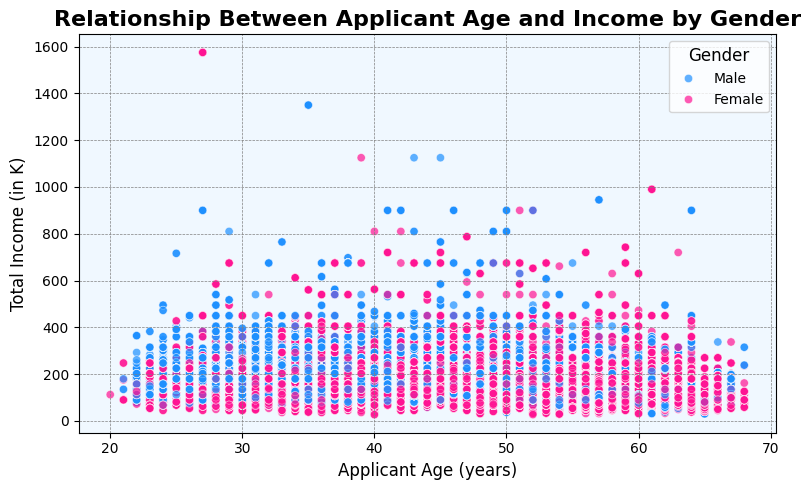

In [158]:
# Scatter plot to show relationship between Applicant Age and Income in K by Gender
plt.figure(figsize=(8, 5))

# Create a scatter plot with gender differentiation
scatter_plot = sns.scatterplot(
    data=app_record,
    x='APPLICANT_AGE',
    y=app_record['TOTAL_INCOME'] / 1000,  # Divide income by 1000 directly
    hue='GENDER',  # Differentiate by gender
    palette={'M': 'dodgerblue', 'F': 'deeppink'},  # Assign distinct colors to genders
    alpha=0.7
)

# Set background color for the entire plot area
scatter_plot.set_facecolor('aliceblue')  # Apply color to the graph's background

# Add title and labels
plt.title('Relationship Between Applicant Age and Income by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Applicant Age (years)', fontsize=12)
plt.ylabel('Total Income (in K)', fontsize=12)

# Access the legend
handles, labels = scatter_plot.get_legend_handles_labels()  # Get legend elements
plt.legend(
    handles=handles,  # Ensure correct markers are used
    labels=['Male', 'Female'],  # Match legend labels
    title='Gender',  # Set legend title
    title_fontsize=12,
    fontsize=10,
    loc='upper right'
)

# Add grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


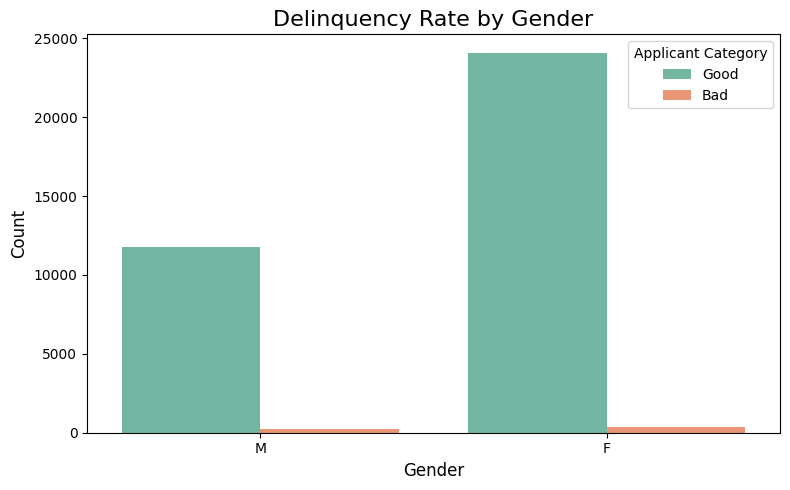

In [160]:
# Count plot to show the delinquency rate by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=app_record, x='GENDER', hue='Applicant_Category', palette='Set2')
plt.title('Delinquency Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Applicant Category', loc='upper right', labels=['Good', 'Bad'])
plt.tight_layout()
plt.show()



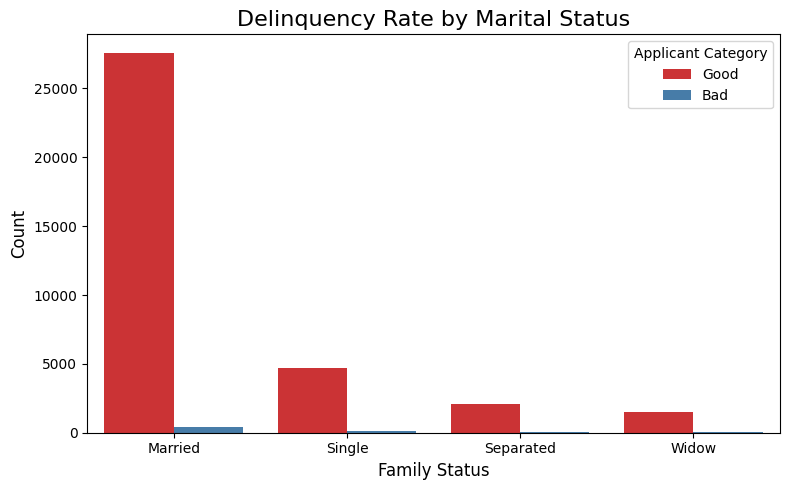

In [161]:
# Count plot to show delinquency rate by marital status
plt.figure(figsize=(8, 5))
sns.countplot(data=app_record, x='FAMILY_STATUS', hue='Applicant_Category', palette='Set1')
plt.title('Delinquency Rate by Marital Status', fontsize=16)
plt.xlabel('Family Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Applicant Category', loc='upper right', labels=['Good', 'Bad'])
plt.tight_layout()
plt.show()
